In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


In [3]:
df = pd.read_csv("climate_change_impact_on_agriculture_2024.csv")
df

Year    Country              Region  Crop_Type  Average_Temperature_C  \
0     2001      India         West Bengal       Corn                   1.55   
1     2024      China               North       Corn                   3.23   
2     2001     France       Ile-de-France      Wheat                  21.11   
3     2001     Canada            Prairies     Coffee                  27.85   
4     1998      India          Tamil Nadu  Sugarcane                   2.19   
...    ...        ...                 ...        ...                    ...   
9995  2022     France  Nouvelle-Aquitaine     Cotton                  30.48   
9996  1999  Australia          Queensland   Soybeans                   9.53   
9997  2000  Argentina           Patagonia     Coffee                  31.92   
9998  1996     Brazil           Southeast   Soybeans                  13.95   
9999  2015      China               South       Corn                  11.78   

      Total_Precipitation_mm  CO2_Emissions_MT  Crop_Yield_MT_per_HA  \
0                     447.06             15.22                 1.737   
1                    2913.57             29.82                 1.737   
2                    1301.74             25.75                 1.719   
3                    1154.36             13.91                 3.890   
4                    1627.48             11.81                 1.080   
...                      ...               ...                   ...   
9995                  685.93             17.64                 3.033   
9996                 2560.38             10.68                 2.560   
9997                  357.76             26.01                 1.161   
9998                 1549.52             17.31                 3.348   
9999                 1676.25              5.34                 3.710   

      Extreme_Weather_Events  Irrigation_Access_%  Pesticide_Use_KG_per_HA  \
0                          8                14.54                    10.08   
1                          8                11.05                    33.06   
2                          5                84.42                    27.41   
3                          5                94.06                    14.38   
4                          9                95.75                    44.35   
...                      ...                  ...                      ...   
9995                       9                27.56                    41.96   
9996                       4                77.02                     5.45   
9997                      10                78.53                    11.94   
9998                       2                42.65                    44.71   
9999                       5                46.41                    48.28   

      Fertilizer_Use_KG_per_HA  Soil_Health_Index Adaptation_Strategies  \
0                        14.78              83.25      Water Management   
1                        23.25              54.02         Crop Rotation   
2                        65.53              67.78      Water Management   
3                        87.58              91.39         No Adaptation   
4                        88.08              49.61         Crop Rotation   
...                        ...                ...                   ...   
9995                     10.95              43.41         No Adaptation   
9996                     82.32              59.39         No Adaptation   
9997                     26.00              41.46      Water Management   
9998                     25.07              75.10         Crop Rotation   
9999                     98.27              59.38      Water Management   

      Economic_Impact_Million_USD  
0                          808.13  
1                          616.22  
2                          796.96  
3                          790.32  
4                          401.72  
...                           ...  
9995                      1483.06  
9996                       829.61  
9997                       155

In [4]:
df.dtypes

Year                             int64
Country                         object
Region                          object
Crop_Type                       object
Average_Temperature_C          float64
Total_Precipitation_mm         float64
CO2_Emissions_MT               float64
Crop_Yield_MT_per_HA           float64
Extreme_Weather_Events           int64
Irrigation_Access_%            float64
Pesticide_Use_KG_per_HA        float64
Fertilizer_Use_KG_per_HA       float64
Soil_Health_Index              float64
Adaptation_Strategies           object
Economic_Impact_Million_USD    float64
dtype: object

# Checking Missing Value

In [8]:
df.isnull().sum().sum()

0

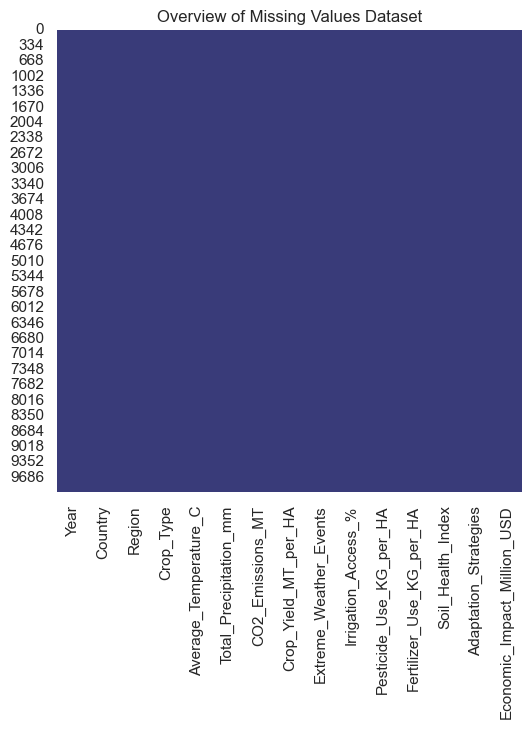

In [9]:
plt.figure(figsize=(6,6))
sns.heatmap(df.isnull(), cmap="tab20b", cbar=False).set_title('Overview of Missing Values Dataset')
plt.show()

# Check Duplicated Rows

In [10]:
duplicate_rows = df.duplicated()

# Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.sum()
print(num_duplicate_rows)

0


# EDA

In [11]:
# 2. Descriptive statistics for numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

## 1) Descriptive Statistics for Numerical Columns

In [12]:
df[numerical_columns].describe()

Year  Average_Temperature_C  Total_Precipitation_mm  \
count  10000.000000           10000.000000            10000.000000   
mean    2007.088700              15.241299             1611.663834   
std       10.084245              11.466955              805.016815   
min     1990.000000              -4.990000              200.150000   
25%     1999.000000               5.430000              925.697500   
50%     2007.000000              15.175000             1611.160000   
75%     2016.000000              25.340000             2306.997500   
max     2024.000000              35.000000             2999.670000   

       CO2_Emissions_MT  Crop_Yield_MT_per_HA  Extreme_Weather_Events  \
count      10000.000000          10000.000000            10000.000000   
mean          15.246608              2.240017                4.980900   
std            8.589423              0.998342                3.165808   
min            0.500000              0.450000                0.000000   
25%            7.760000              1.449000                2.000000   
50%           15.200000              2.170000                5.000000   
75%           22.820000              2.930000                8.000000   
max           30.000000              5.000000               10.000000   

       Irrigation_Access_%  Pesticide_Use_KG_per_HA  Fertilizer_Use_KG_per_HA  \
count         10000.000000             10000.000000              10000.000000   
mean             55.248332                24.955735                 49.973708   
std              25.988305                14.490962                 28.711027   
min              10.010000                 0.000000                  0.010000   
25%              32.677500                12.527500                 25.390000   
50%              55.175000                24.930000                 49.635000   
75%              77.582500                37.470000                 74.825000   
max              99.990000                49.990000                 99.990000   

       Soil_Health_Index  Economic_Impact_Million_USD  
count       10000.000000                 10000.000000  
mean           64.901278                   674.269658  
std            20.195882                   414.591431  
min            30.000000                    47.840000  
25%            47.235000                   350.545000  
50%            64.650000                   583.920000  
75%            82.472500                   917.505000  
max           100.000000                  2346.470000

## 2) Understanding the distribution of categorical column

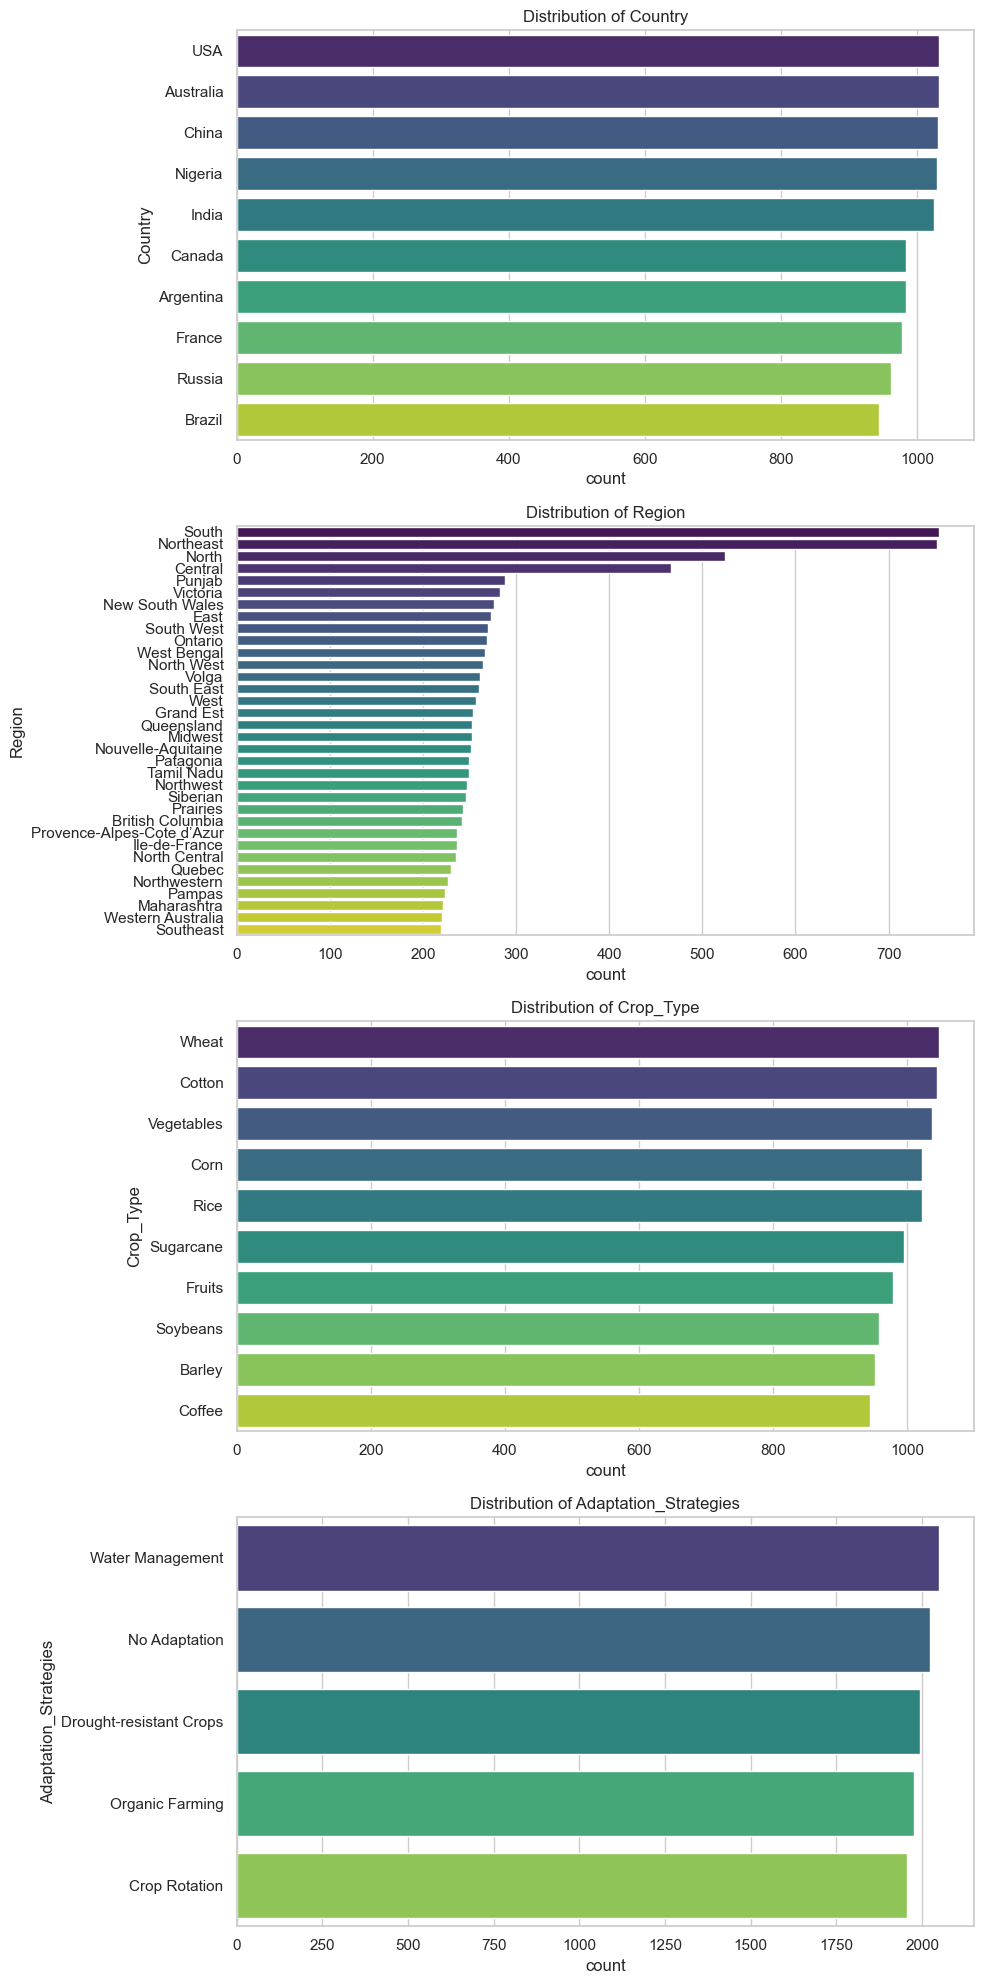

In [13]:
fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(10, 5 * len(categorical_columns)))
for i, col in enumerate(categorical_columns):
    sns.countplot(y=df[col], ax=axes[i], order=df[col].value_counts().index, palette="viridis")
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


## 3) Correlation

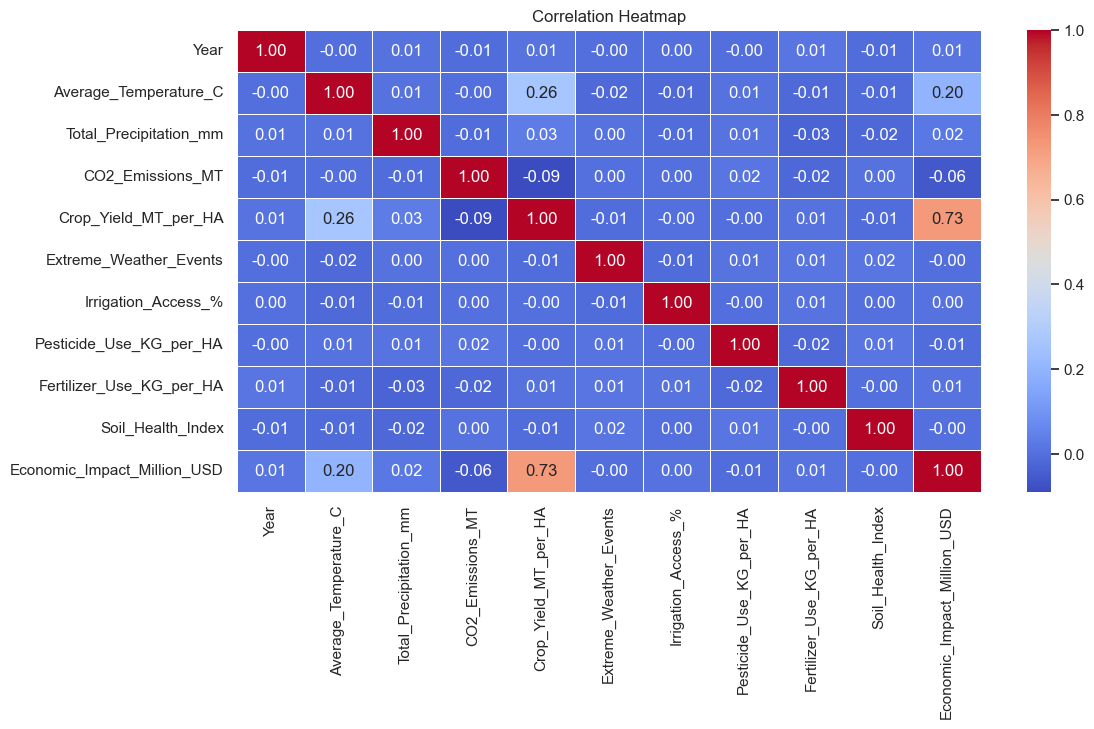

In [14]:
# 4. Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## 4) Boxplot

In [33]:
def show_distribution(var): 
    fig, ax = plt.subplots(2,1, figsize = (12, 8)) 
    sns.histplot(df, x = var, color = 'red', alpha = 0.2, kde = True, bins = 15, ax = ax[0]) 
    ax[0].set_ylabel("Frequency") 
    ax[0].axvline(x = df[var].mean(), color = 'yellow', ls = "--", lw = 2, ) 
    ax[0].axvline(x = df[var].median(), color = 'cyan', ls = "--", lw = 2) 
    sns.boxplot(df, x = var, ax = ax[1]) 
    ax[1].set_xlabel(var) 


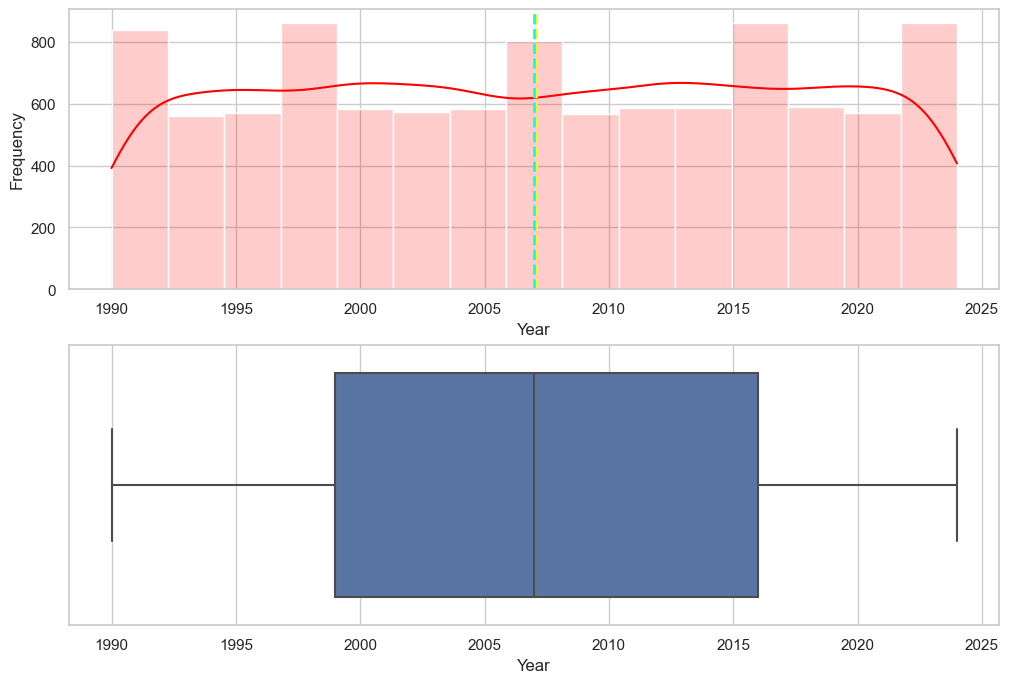

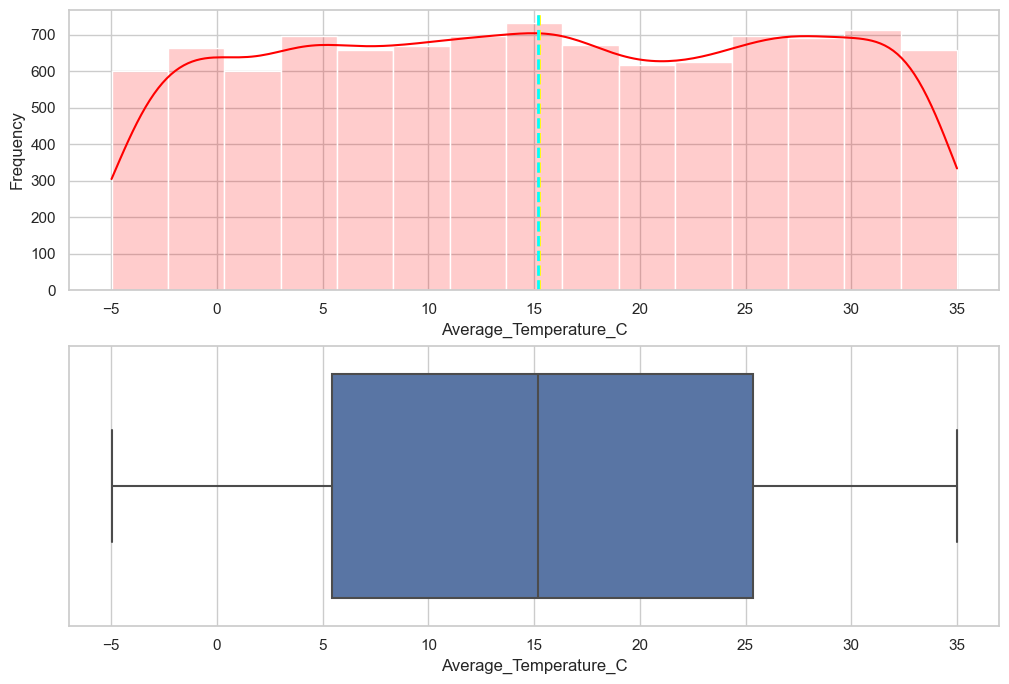

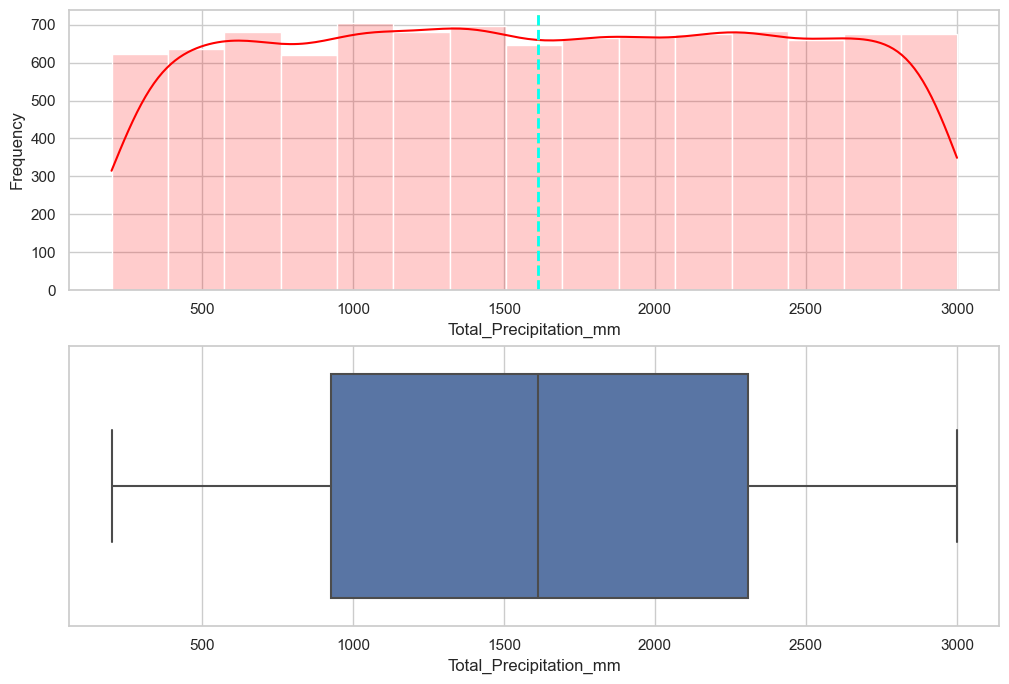

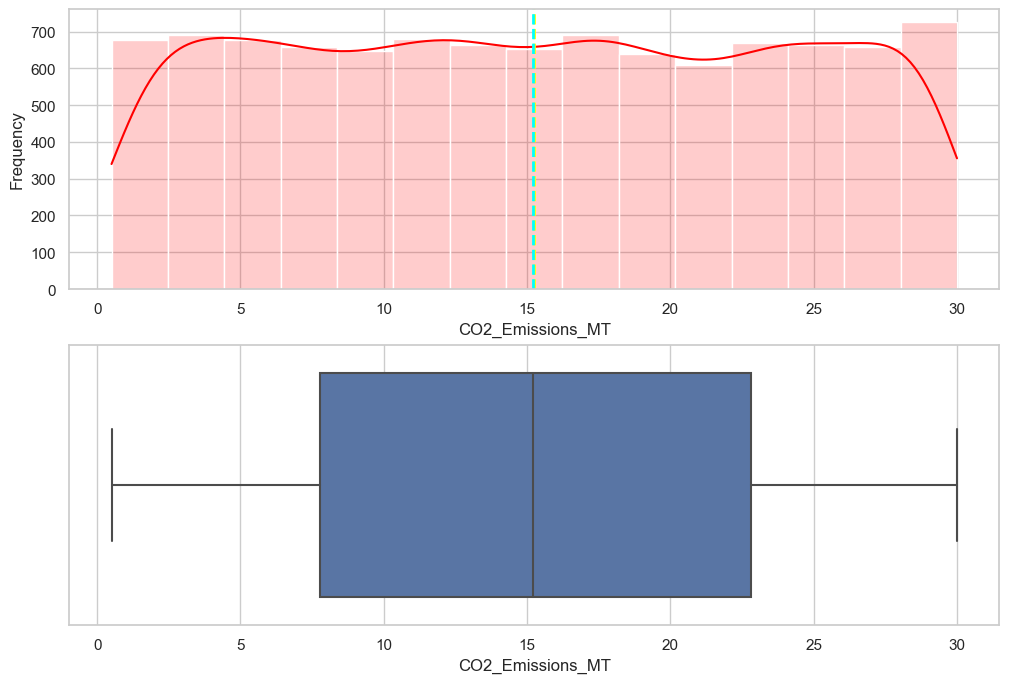

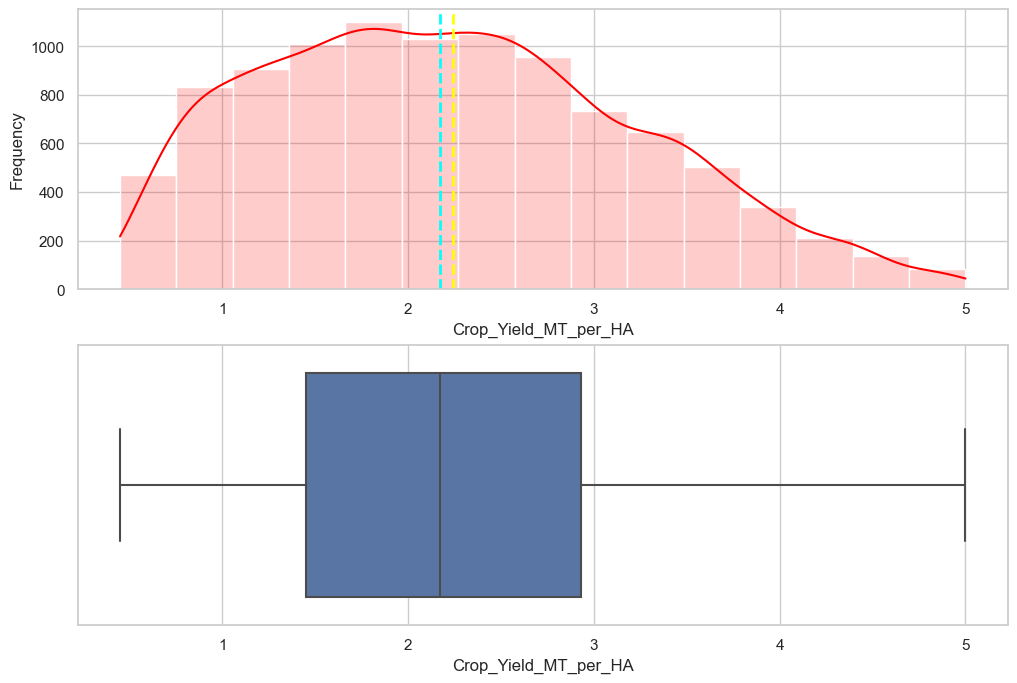

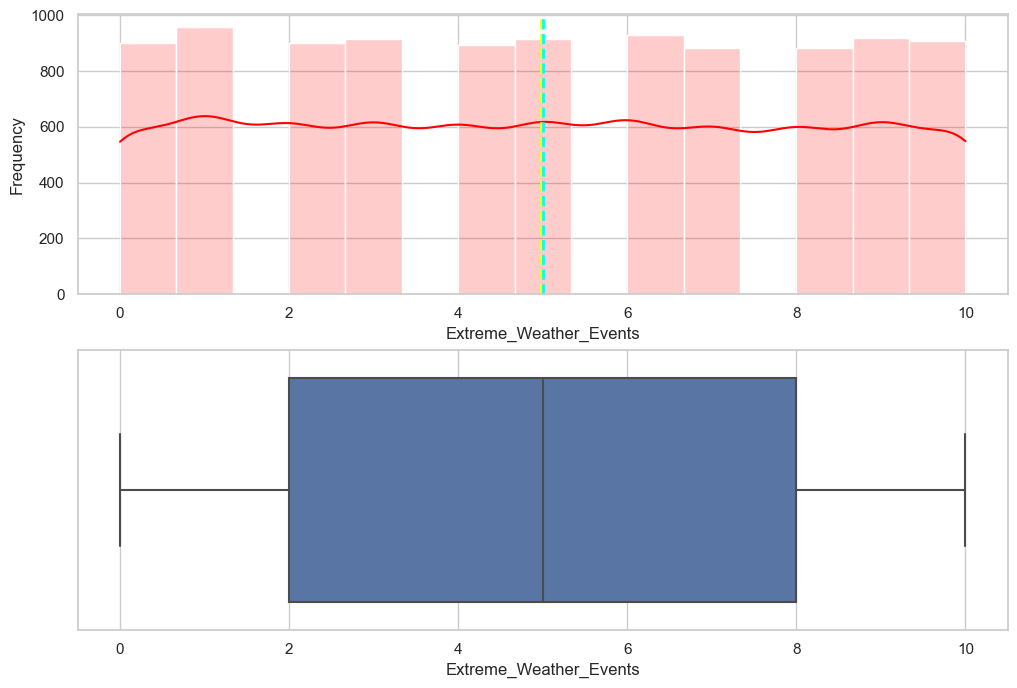

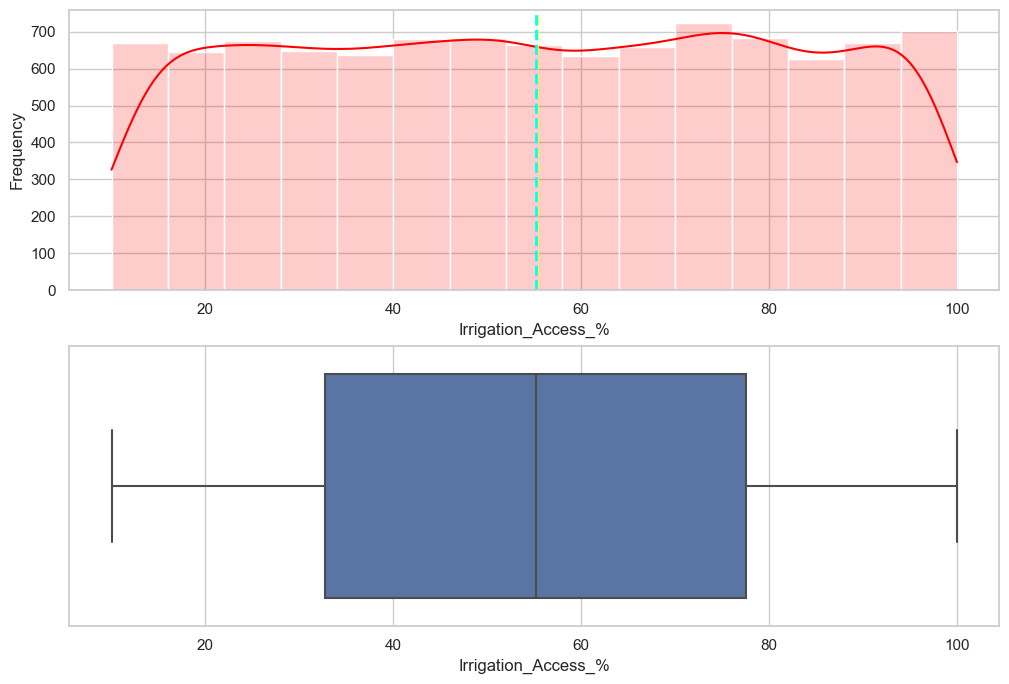

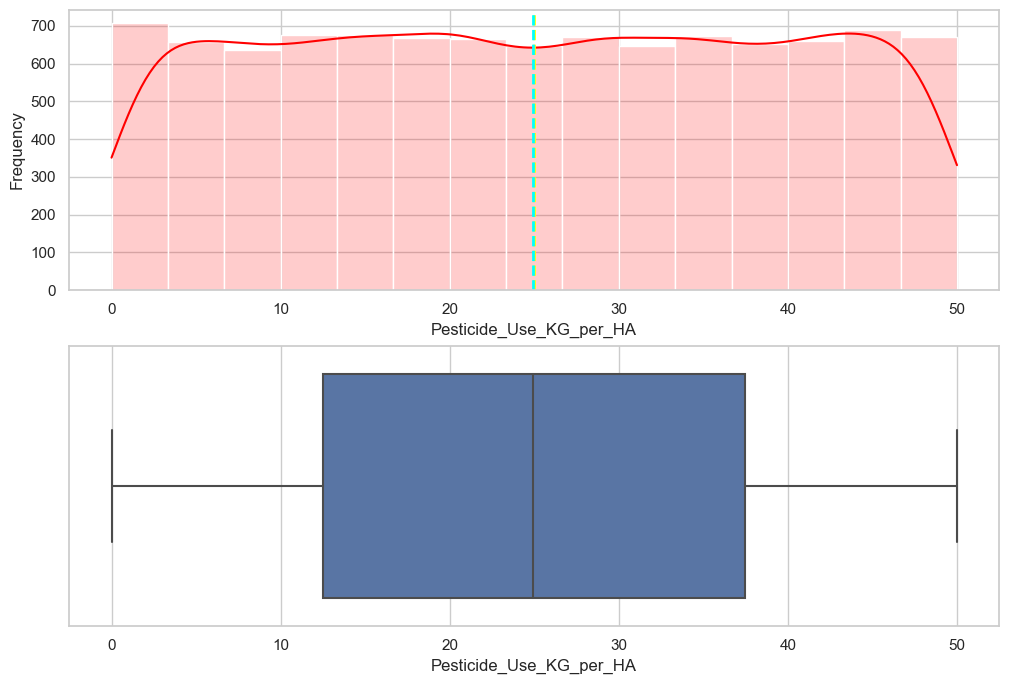

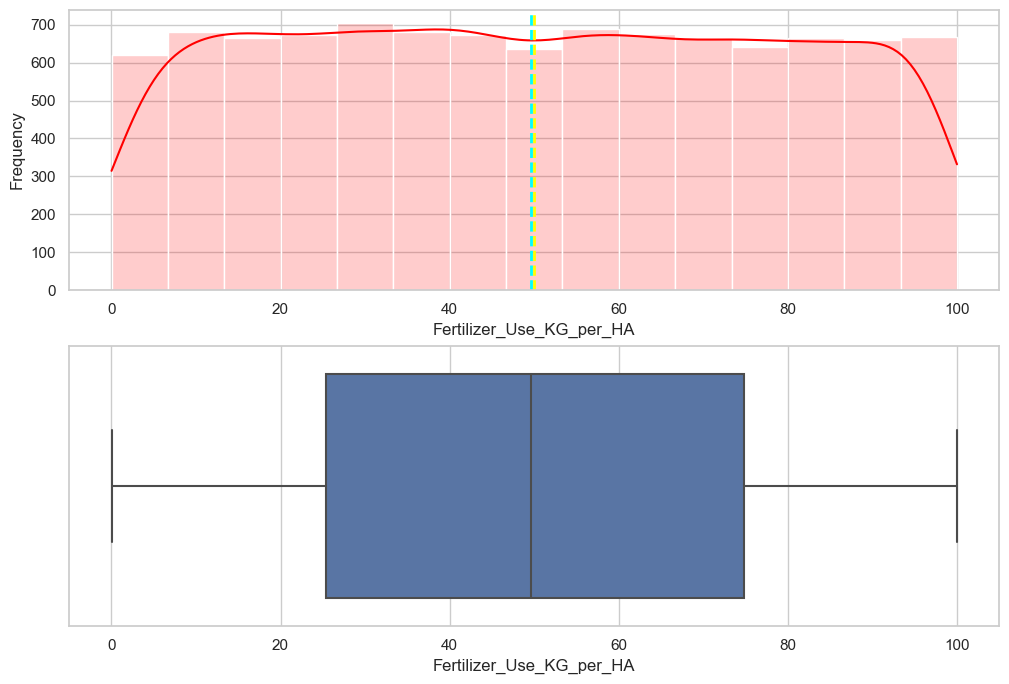

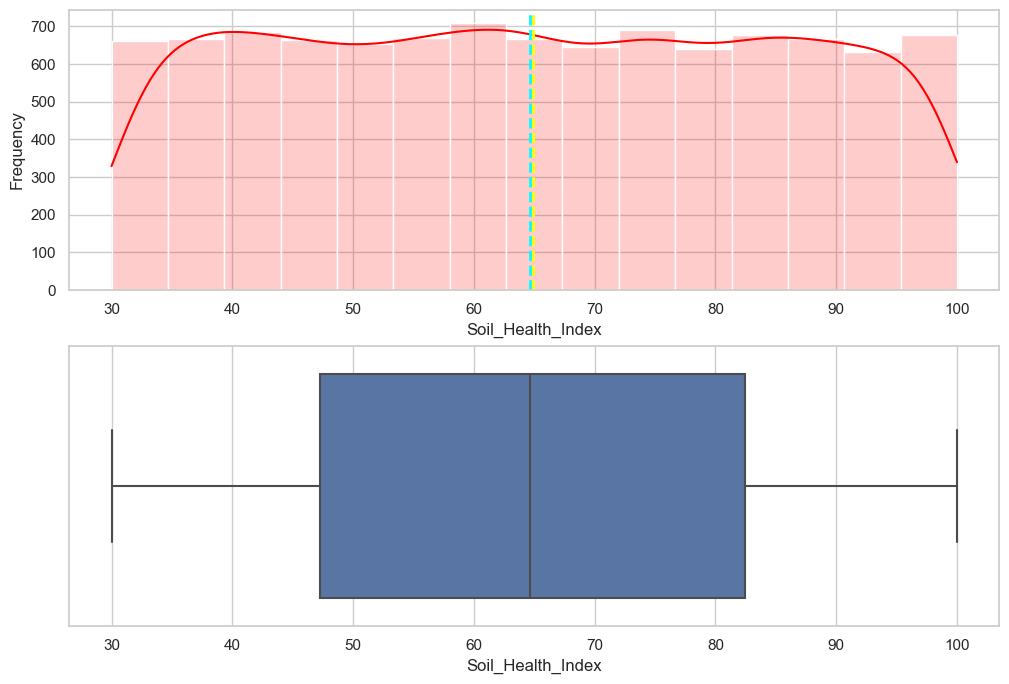

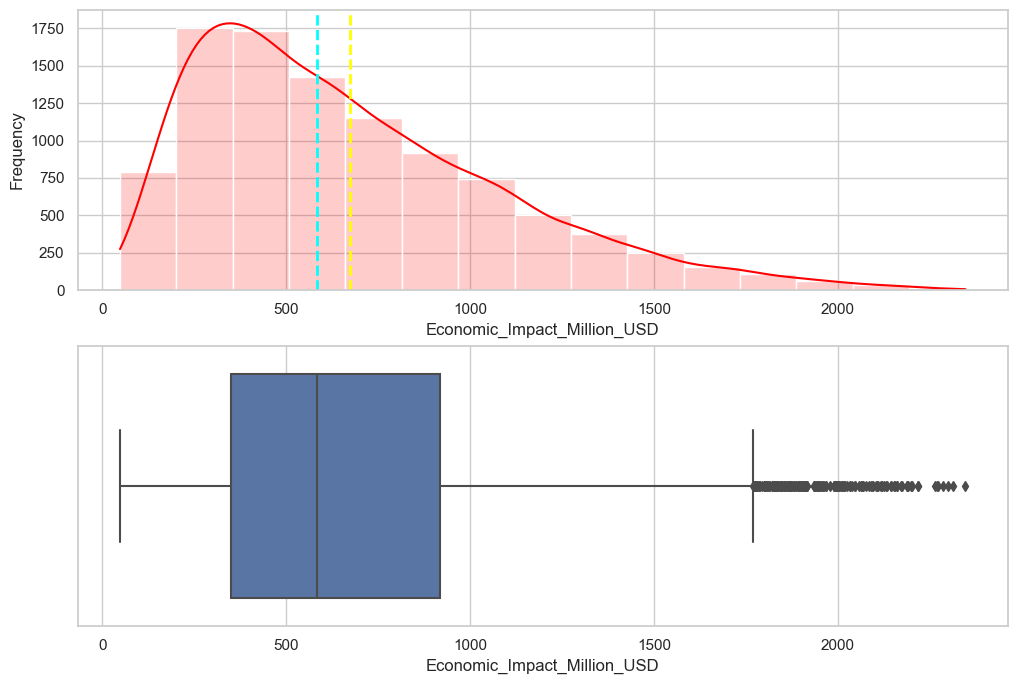

In [34]:
for col in numerical_columns: 
    show_distribution(col) 


# 5) Pairplot

C:\Users\yeoh9\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


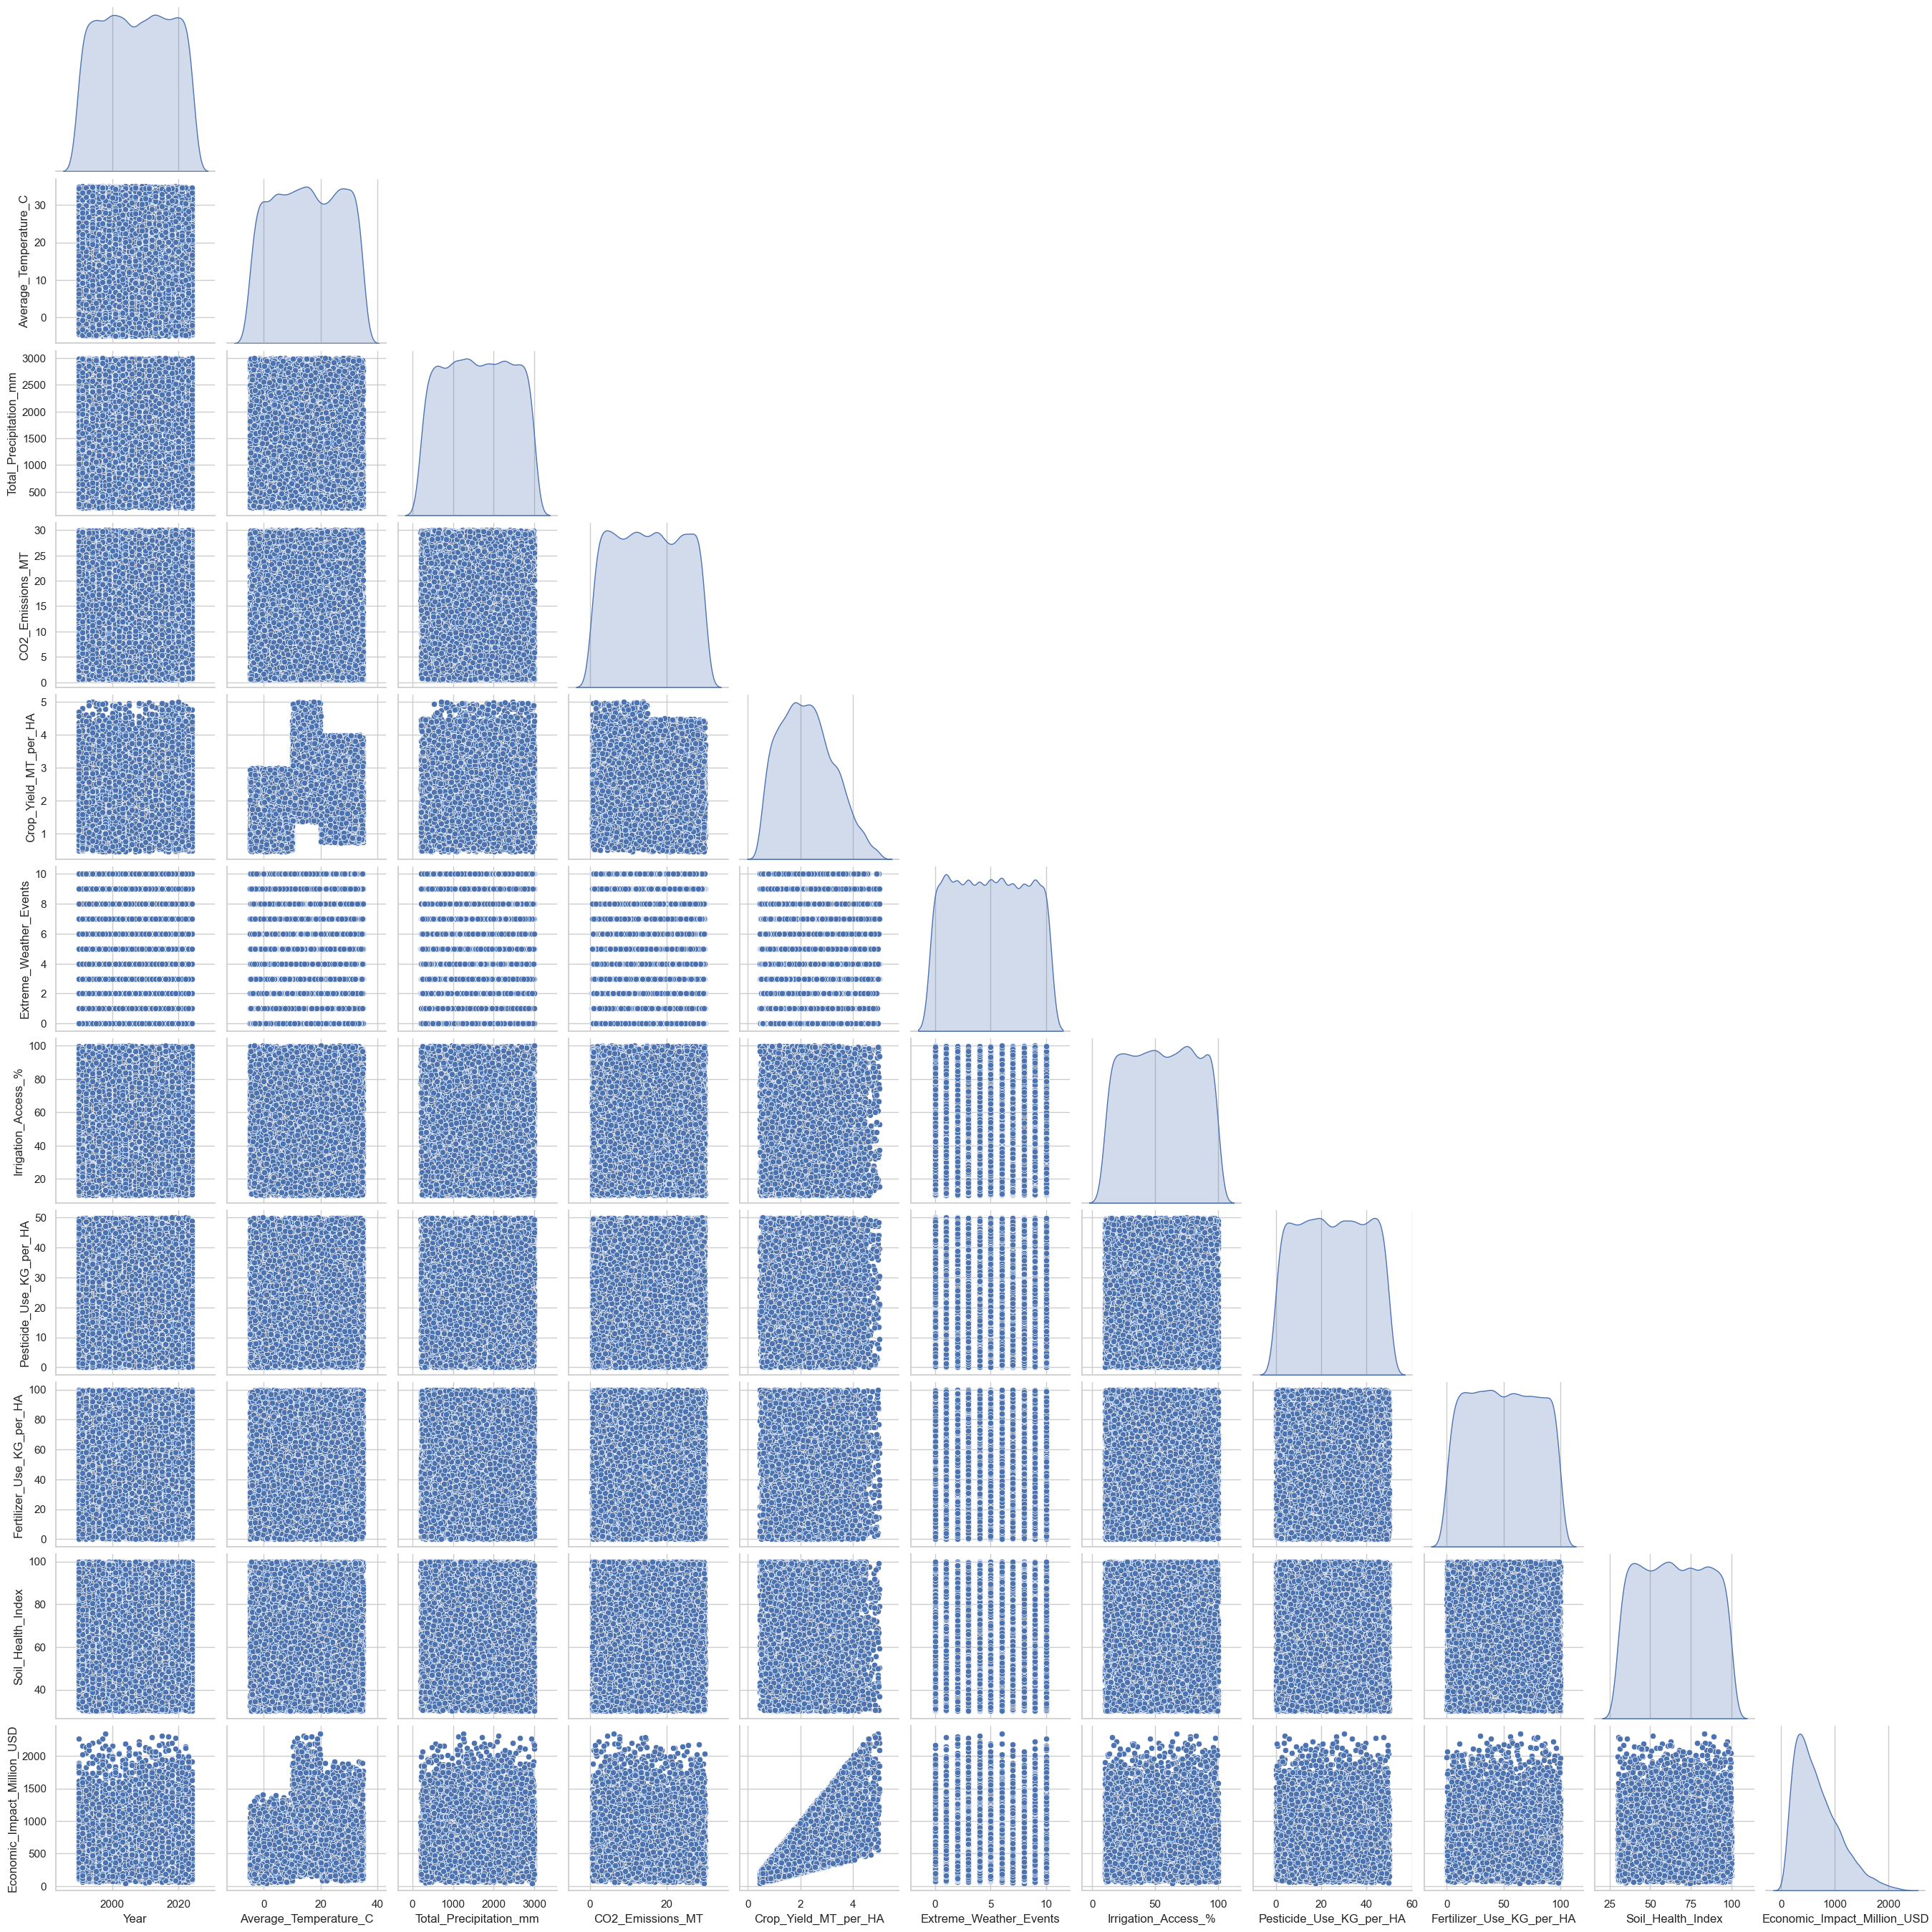

In [35]:
sns.pairplot(df[numerical_columns], diag_kind="kde", corner=True)
plt.show()